In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from pprint import pprint
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data set

### training data

In [95]:
tdS = pd.read_csv('./dataCSV/manSf_trainingNDVI.csv') #'training.csv'파일 불러오기 - ndvi 안한거
tdSG = pd.read_csv('./dataCSV/manSGf_trainingNDVI.csv')

In [96]:
tdS

,family,NDVI,SBI,YVI,WBI,ARVI,EVI,VAR,HOMO,DISSI,ENTROPY
0,2,0.449799,0.298280,-0.016917,-0.013949,0.341932,0.463141,63.033989,0.821769,0.6576,2.343803
1,2,0.528892,0.317979,-0.018384,-0.019453,0.402915,0.579876,87.777626,0.833767,0.6600,2.201375
2,4,0.522188,0.302055,-0.017910,-0.007879,0.402971,0.541707,65.340111,0.697489,0.7832,3.468864
3,2,0.481356,0.304262,-0.014294,-0.015841,0.370651,0.520641,91.668144,0.726444,0.9676,3.056463
4,2,0.375739,0.271016,-0.009948,-0.022487,0.291040,0.360450,64.191360,0.729394,0.9656,3.146740
...,...,...,...,...,...,...,...,...,...,...,...
1571,6,0.282032,0.386990,-0.040443,-0.033954,0.188179,0.342877,66.108940,0.573028,1.2404,4.008459
1572,6,0.345640,0.403220,-0.037413,-0.027609,0.241583,0.458810,68.771187,0.547515,1.3244,4.091058
1573,6,0.230226,0.416955,-0.049195,-0.040042,0.145644,0.291453,60.233128,0.592855,1.2008,3.930270
1574,6,0.219792,0.404550,-0.040675,-0.038480,0.149851,0.288065,26.144325,0.809760,0.5932,2.486631


## man_training split test (Create mantest) - extract same percent LC

In [97]:
lcS1 = tdS[ tdS['family'] == 1 ]
lcS2 = tdS[ tdS['family'] == 2 ]
lcS3 = tdS[ tdS['family'] == 3 ]
lcS4 = tdS[ tdS['family'] == 4 ]
lcS5 = tdS[ tdS['family'] == 5 ]
lcS6 = tdS[ tdS['family'] == 6 ]
lcS7 = tdS[ tdS['family'] == 7 ]
lcS = [lcS1, lcS2, lcS3, lcS4, lcS5, lcS6, lcS7]

In [98]:
lcSG1 = tdSG[ tdSG['family'] == 1 ]
lcSG2 = tdSG[ tdSG['family'] == 2 ]
lcSG3 = tdSG[ tdSG['family'] == 3 ]
lcSG4 = tdSG[ tdSG['family'] == 4 ]
lcSG5 = tdSG[ tdSG['family'] == 5 ]
lcSG6 = tdSG[ tdSG['family'] == 6 ]
lcSG7 = tdSG[ tdSG['family'] == 7 ]
lcSG = [lcSG1, lcSG2, lcSG3, lcSG4, lcSG5, lcSG6, lcSG7]

In [99]:
for i in range(7):
    globals()[f'mantestS{i}'] = lcS[i].sample(n=55 , random_state=99, ignore_index=False)   # S랑 SG 둘 다 똑같은 인덱스로 추출된 것 확인함.
    globals()[f'mantestSG{i}'] = lcSG[i].sample(n=55 , random_state=99, ignore_index=False) # 하나에 55개 *7 = 385
mantestS = pd.concat([mantestS0, mantestS1, mantestS2, mantestS3, mantestS4, mantestS5, mantestS6], ignore_index=True)
mantestSG = pd.concat([mantestSG0, mantestSG1, mantestSG2, mantestSG3, mantestSG4, mantestSG5, mantestSG6], ignore_index=True)

In [100]:
tdS

,family,NDVI,SBI,YVI,WBI,ARVI,EVI,VAR,HOMO,DISSI,ENTROPY
0,2,0.449799,0.298280,-0.016917,-0.013949,0.341932,0.463141,63.033989,0.821769,0.6576,2.343803
1,2,0.528892,0.317979,-0.018384,-0.019453,0.402915,0.579876,87.777626,0.833767,0.6600,2.201375
2,4,0.522188,0.302055,-0.017910,-0.007879,0.402971,0.541707,65.340111,0.697489,0.7832,3.468864
3,2,0.481356,0.304262,-0.014294,-0.015841,0.370651,0.520641,91.668144,0.726444,0.9676,3.056463
4,2,0.375739,0.271016,-0.009948,-0.022487,0.291040,0.360450,64.191360,0.729394,0.9656,3.146740
...,...,...,...,...,...,...,...,...,...,...,...
1571,6,0.282032,0.386990,-0.040443,-0.033954,0.188179,0.342877,66.108940,0.573028,1.2404,4.008459
1572,6,0.345640,0.403220,-0.037413,-0.027609,0.241583,0.458810,68.771187,0.547515,1.3244,4.091058
1573,6,0.230226,0.416955,-0.049195,-0.040042,0.145644,0.291453,60.233128,0.592855,1.2008,3.930270
1574,6,0.219792,0.404550,-0.040675,-0.038480,0.149851,0.288065,26.144325,0.809760,0.5932,2.486631


## Create Rtrain

In [101]:
Stemp = pd.concat([tdS, mantestS], ignore_index=True)
SGtemp = pd.concat([tdSG, mantestSG], ignore_index=True)
Stemp

,family,NDVI,SBI,YVI,WBI,ARVI,EVI,VAR,HOMO,DISSI,ENTROPY
0,2,0.449799,0.298280,-0.016917,-0.013949,0.341932,0.463141,63.033989,0.821769,0.6576,2.343803
1,2,0.528892,0.317979,-0.018384,-0.019453,0.402915,0.579876,87.777626,0.833767,0.6600,2.201375
2,4,0.522188,0.302055,-0.017910,-0.007879,0.402971,0.541707,65.340111,0.697489,0.7832,3.468864
3,2,0.481356,0.304262,-0.014294,-0.015841,0.370651,0.520641,91.668144,0.726444,0.9676,3.056463
4,2,0.375739,0.271016,-0.009948,-0.022487,0.291040,0.360450,64.191360,0.729394,0.9656,3.146740
...,...,...,...,...,...,...,...,...,...,...,...
1956,7,0.515908,0.267457,-0.001410,-0.013909,0.419500,0.529304,93.343628,0.514167,1.8160,4.334028
1957,7,0.481644,0.320810,-0.021831,-0.013581,0.362007,0.523532,69.967506,0.601928,1.2080,4.066278
1958,7,0.252615,0.357078,-0.034534,-0.034389,0.172180,0.287721,58.102169,0.642008,0.9376,3.643250
1959,7,0.377859,0.221387,-0.000652,-0.009086,0.321511,0.298138,104.235794,0.600341,1.1172,4.097005


In [102]:
RtrainS = Stemp.drop_duplicates(['NDVI', 'SBI'], keep = False, ignore_index=True)
RtrainSG = SGtemp.drop_duplicates(['NDVI', 'SBI'], keep = False, ignore_index=True)
RtrainS

,family,NDVI,SBI,YVI,WBI,ARVI,EVI,VAR,HOMO,DISSI,ENTROPY
0,2,0.449799,0.298280,-0.016917,-0.013949,0.341932,0.463141,63.033989,0.821769,0.6576,2.343803
1,2,0.528892,0.317979,-0.018384,-0.019453,0.402915,0.579876,87.777626,0.833767,0.6600,2.201375
2,4,0.522188,0.302055,-0.017910,-0.007879,0.402971,0.541707,65.340111,0.697489,0.7832,3.468864
3,2,0.481356,0.304262,-0.014294,-0.015841,0.370651,0.520641,91.668144,0.726444,0.9676,3.056463
4,2,0.375739,0.271016,-0.009948,-0.022487,0.291040,0.360450,64.191360,0.729394,0.9656,3.146740
...,...,...,...,...,...,...,...,...,...,...,...
1186,6,0.282032,0.386990,-0.040443,-0.033954,0.188179,0.342877,66.108940,0.573028,1.2404,4.008459
1187,6,0.345640,0.403220,-0.037413,-0.027609,0.241583,0.458810,68.771187,0.547515,1.3244,4.091058
1188,6,0.230226,0.416955,-0.049195,-0.040042,0.145644,0.291453,60.233128,0.592855,1.2008,3.930270
1189,6,0.219792,0.404550,-0.040675,-0.038480,0.149851,0.288065,26.144325,0.809760,0.5932,2.486631


## x_train, y_train

In [103]:
# training data set
xS = RtrainS.drop(["family"],axis=1)
yS = RtrainS[["family"]].astype(str)  #DataFrame 열을 문자열로 변환
xSG = RtrainSG.drop(["family"],axis=1)
ySG = RtrainSG[["family"]].astype(str)  #DataFrame 열을 문자열로 변환
xS

,NDVI,SBI,YVI,WBI,ARVI,EVI,VAR,HOMO,DISSI,ENTROPY
0,0.449799,0.298280,-0.016917,-0.013949,0.341932,0.463141,63.033989,0.821769,0.6576,2.343803
1,0.528892,0.317979,-0.018384,-0.019453,0.402915,0.579876,87.777626,0.833767,0.6600,2.201375
2,0.522188,0.302055,-0.017910,-0.007879,0.402971,0.541707,65.340111,0.697489,0.7832,3.468864
3,0.481356,0.304262,-0.014294,-0.015841,0.370651,0.520641,91.668144,0.726444,0.9676,3.056463
4,0.375739,0.271016,-0.009948,-0.022487,0.291040,0.360450,64.191360,0.729394,0.9656,3.146740
...,...,...,...,...,...,...,...,...,...,...
1186,0.282032,0.386990,-0.040443,-0.033954,0.188179,0.342877,66.108940,0.573028,1.2404,4.008459
1187,0.345640,0.403220,-0.037413,-0.027609,0.241583,0.458810,68.771187,0.547515,1.3244,4.091058
1188,0.230226,0.416955,-0.049195,-0.040042,0.145644,0.291453,60.233128,0.592855,1.2008,3.930270
1189,0.219792,0.404550,-0.040675,-0.038480,0.149851,0.288065,26.144325,0.809760,0.5932,2.486631


In [104]:
yS

,family
0,2
1,2
2,4
3,2
4,2
...,...
1186,6
1187,6
1188,6
1189,6


### test data

In [105]:
testS = pd.read_csv('./dataCSV/brDetectSf_testNDVI.csv')
testSG = pd.read_csv('./dataCSV/brDetectSGf_testNDVI.csv')
AtestS = pd.read_csv('./dataCSV/brActualS_testNDVI.csv')
AtestSG = pd.read_csv('./dataCSV/brActualSG_testNDVI.csv')
testS

,family,NDVI,SBI,YVI,WBI,ARVI,EVI
0,1,0.497691,0.302976,-0.020731,-0.008972,0.377327,0.505724
1,5,0.696190,0.362867,-0.022917,-0.006648,0.569100,0.861235
2,5,0.275884,0.250853,-0.011642,-0.029185,0.212191,0.233440
3,7,0.243782,0.333793,-0.031668,-0.038639,0.163830,0.257070
4,7,0.634993,0.224901,0.003659,-0.007134,0.536797,0.541509
...,...,...,...,...,...,...,...
1943,3,0.407680,0.295629,-0.014130,-0.028465,0.305080,0.422250
1944,3,0.539983,0.307562,-0.016492,-0.014227,0.417168,0.577853
1945,3,0.452098,0.282844,-0.009094,-0.006684,0.361790,0.468880
1946,3,0.470635,0.322896,-0.020351,-0.027465,0.347679,0.517191


In [106]:
# test data 만들기
xtS = testS.drop(["family"], axis=1)
ytS = testS[["family"]].astype(str)  # DataFrame 열을 문자열로 변환
xtSG = testSG.drop(["family"], axis=1)
ytSG = testSG[["family"]].astype(str)  # DataFrame 열을 문자열로 변환
AxtS = AtestS.drop(["family"], axis=1)
AytS = AtestS[["family"]].astype(str)  # DataFrame 열을 문자열로 변환
AxtSG = AtestSG.drop(["family"], axis=1)
AytSG = AtestSG[["family"]].astype(str)  # DataFrame 열을 문자열로 변환

In [107]:
xSG

,NDVI,SBI,YVI,WBI,ARVI,EVI,VAR,HOMO,DISSI,ENTROPY
0,0.449799,0.298280,-0.016917,-0.013949,0.341932,0.463141,63.033989,0.821769,0.6576,2.343803
1,0.528892,0.317979,-0.018384,-0.019453,0.402915,0.579876,87.777626,0.833767,0.6600,2.201375
2,0.522188,0.302055,-0.017910,-0.007879,0.402971,0.541707,65.340111,0.697489,0.7832,3.468864
3,0.481356,0.304262,-0.014294,-0.015841,0.370651,0.520641,91.668144,0.726444,0.9676,3.056463
4,0.375739,0.271016,-0.009948,-0.022487,0.291040,0.360450,64.191360,0.729394,0.9656,3.146740
...,...,...,...,...,...,...,...,...,...,...
1161,0.353603,0.312261,-0.024219,-0.019507,0.256953,0.364069,97.230370,0.624060,0.9484,3.683531
1162,0.235558,0.414469,-0.044795,-0.036245,0.156557,0.308637,74.329773,0.595762,1.1124,4.016178
1163,0.282032,0.386990,-0.040443,-0.033954,0.188179,0.342877,66.108940,0.573028,1.2404,4.008459
1164,0.230226,0.416955,-0.049195,-0.040042,0.145644,0.291453,60.233128,0.592855,1.2008,3.930270


In [108]:
# training data 75% validation data 25% 로 나눔 
x_trainS, x_valS, y_trainS, y_valS = train_test_split(xS.values, yS.values, test_size=0.25, random_state=99)
x_trainSG, x_valSG, y_trainSG, y_valSG = train_test_split(xSG.values, ySG.values, test_size=0.25, random_state=99)

# hyperparameter

## 1번

## S hyperparameter

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.30201342281879195, 0.3053691275167785, 0.3087248322147651, 0.2986577181208054, 0.28859060402684567, 0.31208053691275167, 0.3053691275167785, 0.3087248322147651, 0.3053691275167785]


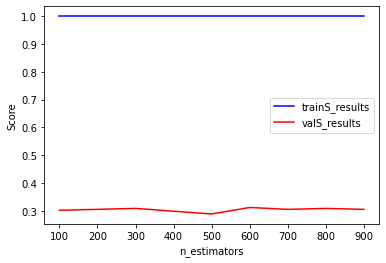

In [109]:
# Hyperparameter -  n_estimators 찾기

# 빈 배열을 생성하여 값 저장
n_estimators=[]
train_results=[]
test_results=[]

# start~end 까지 step간격으로 증가시키는 함수 생성 
def myrange(start, end, step): 
    r = start
    while(r<end):
        yield r
        r += step

# for문을 사용하여 100~1000 값을 n_estimators에 넣어줌
for i in myrange(100,1000,100):
    rf_test = RandomForestClassifier(n_estimators=i, random_state=99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainS, y_trainS.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainS, y_trainS)) # append함수로 현재 n_estimators 값에서의  training data 정확도 추가
    test_results.append(rf_test.score(x_valS, y_valS)) # append함수로 현재 n_estimators  값에서의 validation data 정확도 추가
    n_estimators.append(i) # append함수로 새로운  n_estimators값 추가
    
# 정확도 출력       
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(n_estimators, train_results,'b',label='trainS_results') # training data 정확도 그래프 생성 (blue)
plt.plot(n_estimators, test_results,'r',label='valS_results')  # validation data 정확도 그래프 생성 (red)
plt.xlabel('n_estimators') # x축= n_estimators
plt.ylabel('Score')  # y축= Score
plt.legend() #범례 
plt.show() #그래프 출력 

[0.25867861142217247, 0.3023516237402016, 0.3829787234042553, 0.47256438969764836, 0.5341545352743561, 0.6192609182530795, 0.7357222844344905, 0.832026875699888, 0.9025755879059351, 0.9518477043673013, 0.9809630459126539, 0.9944008958566629, 0.9988801791713325, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.2483221476510067, 0.28523489932885904, 0.2751677852348993, 0.29194630872483224, 0.3288590604026846, 0.3087248322147651, 0.2986577181208054, 0.30201342281879195, 0.29194630872483224, 0.28859060402684567, 0.31208053691275167, 0.30201342281879195, 0.2986577181208054, 0.2953020134228188, 0.2953020134228188, 0.30201342281879195, 0.28187919463087246, 0.2986577181208054, 0.3087248322147651, 0.2986577181208054]


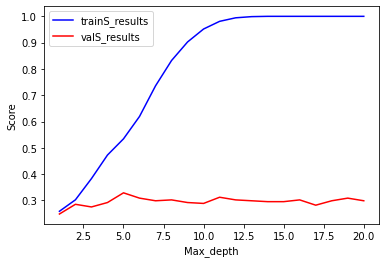

In [110]:
# Hyperparameter - max_depth 찾기 

# 빈 배열을 생성하여 값 저장 
Max_depth=[] 
train_results = [] 
val_results = []

# for문을 사용하여 1~21 값을 max depth에 넣어줌 
for i in range(1,21): 
    rf_test = RandomForestClassifier(max_depth=i,random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainS, y_trainS.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainS, y_trainS)) # append함수로 현재 max_depth 값에서의  training data 정확도 추가
    val_results.append(rf_test.score(x_valS, y_valS)) # append함수로 현재 max_depth 값에서의 validation data 정확도 추가 
    Max_depth.append(i)  # append함수로 새로운 max_depth값 추가 

# 정확도 출력 
print(train_results) # training data 정확도
print(val_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(Max_depth, train_results,'b',label='trainS_results') # training data 정확도 그래프 생성 (blue)
plt.plot(Max_depth, val_results,'r',label='valS_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('Max_depth') # x축= Max_depth
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

[1.0, 0.9910414333706606, 0.9473684210526315, 0.8756998880179171, 0.799552071668533]
[0.30201342281879195, 0.28859060402684567, 0.30201342281879195, 0.31208053691275167, 0.31543624161073824]


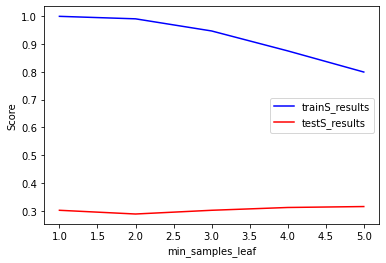

In [111]:
# Hyperparameter -  min_samples_leaf 찾기 

# 빈 배열을 생성하여 값 저장 
min_samples_leaf=[]
train_results = []
test_results = []

# for문을 사용하여 1~6 값을 min_samples_leaf에 넣어줌
for i in range(1,6):
    rf_test = RandomForestClassifier(min_samples_leaf=i, random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainS, y_trainS.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainS, y_trainS)) # append함수로 현재 min_samples_leaf 값에서의  training data 정확도 추가 
    test_results.append(rf_test.score(x_valS, y_valS)) # append함수로 현재  min_samples_leaf 값에서의 validation data 정확도 추가
    min_samples_leaf.append(i) # append함수로 새로운 min_samples_leaf값 추가 
    
# 정확도 출력     
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(min_samples_leaf, train_results,'b',label='trainS_results') # training data 정확도 그래프 생성 (blue)
plt.plot(min_samples_leaf, test_results,'r',label='testS_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('min_samples_leaf') # x축= min_samples_leaf
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

## SG hyper

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.3116438356164384, 0.2945205479452055, 0.3116438356164384, 0.3116438356164384, 0.3082191780821918, 0.3013698630136986, 0.3013698630136986, 0.3082191780821918, 0.3150684931506849]


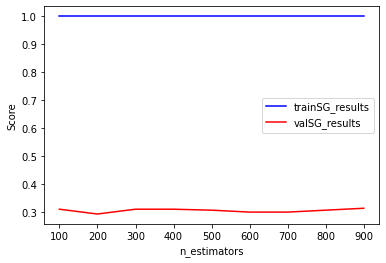

In [112]:
# Hyperparameter -  n_estimators 찾기

# 빈 배열을 생성하여 값 저장
n_estimators=[]
train_results=[]
test_results=[]

# start~end 까지 step간격으로 증가시키는 함수 생성 
def myrange(start, end, step): 
    r = start
    while(r<end):
        yield r
        r += step

# for문을 사용하여 100~1000 값을 n_estimators에 넣어줌
for i in myrange(100,1000,100):
    rf_test = RandomForestClassifier(n_estimators=i, random_state=99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainSG, y_trainSG.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainSG, y_trainSG)) # append함수로 현재 n_estimators 값에서의  training data 정확도 추가
    test_results.append(rf_test.score(x_valSG, y_valSG)) # append함수로 현재 n_estimators  값에서의 validation data 정확도 추가
    n_estimators.append(i) # append함수로 새로운  n_estimators값 추가
    
# 정확도 출력       
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(n_estimators, train_results,'b',label='trainSG_results') # training data 정확도 그래프 생성 (blue)
plt.plot(n_estimators, test_results,'r',label='valSG_results')  # validation data 정확도 그래프 생성 (red)
plt.xlabel('n_estimators') # x축= n_estimators
plt.ylabel('Score')  # y축= Score
plt.legend() #범례 
plt.show() #그래프 출력 

[0.2837528604118993, 0.33638443935926776, 0.34553775743707094, 0.41762013729977115, 0.5137299771167048, 0.6189931350114416, 0.7208237986270023, 0.8032036613272311, 0.8787185354691075, 0.9221967963386728, 0.959954233409611, 0.9851258581235698, 0.9965675057208238, 0.9988558352402745, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.273972602739726, 0.3013698630136986, 0.3150684931506849, 0.3527397260273973, 0.3561643835616438, 0.3253424657534247, 0.339041095890411, 0.3150684931506849, 0.3116438356164384, 0.3253424657534247, 0.3219178082191781, 0.2979452054794521, 0.3013698630136986, 0.2945205479452055, 0.2910958904109589, 0.3184931506849315, 0.2979452054794521, 0.3321917808219178, 0.3184931506849315, 0.3116438356164384]


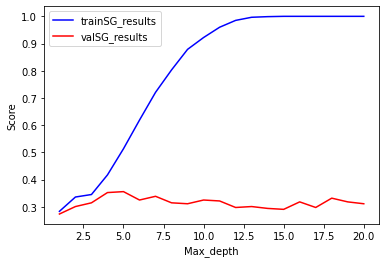

In [113]:
# Hyperparameter - max_depth 찾기 

# 빈 배열을 생성하여 값 저장 
Max_depth=[] 
train_results = [] 
val_results = []

# for문을 사용하여 1~21 값을 max depth에 넣어줌 
for i in range(1,21): 
    rf_test = RandomForestClassifier(max_depth=i,random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainSG, y_trainSG.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainSG, y_trainSG)) # append함수로 현재 max_depth 값에서의  training data 정확도 추가
    val_results.append(rf_test.score(x_valSG, y_valSG)) # append함수로 현재 max_depth 값에서의 validation data 정확도 추가 
    Max_depth.append(i)  # append함수로 새로운 max_depth값 추가 

# 정확도 출력 
print(train_results) # training data 정확도
print(val_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(Max_depth, train_results,'b',label='trainSG_results') # training data 정확도 그래프 생성 (blue)
plt.plot(Max_depth, val_results,'r',label='valSG_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('Max_depth') # x축= Max_depth
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

[1.0, 0.9931350114416476, 0.9553775743707094, 0.8764302059496567, 0.7963386727688787]
[0.3116438356164384, 0.3082191780821918, 0.3082191780821918, 0.3253424657534247, 0.3253424657534247]


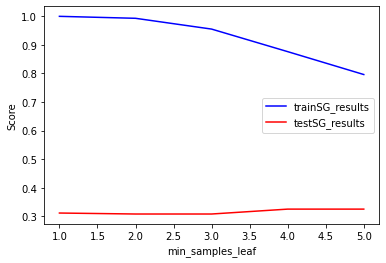

In [114]:
# Hyperparameter -  min_samples_leaf 찾기 

# 빈 배열을 생성하여 값 저장 
min_samples_leaf=[]
train_results = []
test_results = []

# for문을 사용하여 1~6 값을 min_samples_leaf에 넣어줌
for i in range(1,6):
    rf_test = RandomForestClassifier(min_samples_leaf=i, random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainSG, y_trainSG.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainSG, y_trainSG)) # append함수로 현재 min_samples_leaf 값에서의  training data 정확도 추가 
    test_results.append(rf_test.score(x_valSG, y_valSG)) # append함수로 현재  min_samples_leaf 값에서의 validation data 정확도 추가
    min_samples_leaf.append(i) # append함수로 새로운 min_samples_leaf값 추가 
    
# 정확도 출력     
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(min_samples_leaf, train_results,'b',label='trainSG_results') # training data 정확도 그래프 생성 (blue)
plt.plot(min_samples_leaf, test_results,'r',label='testSG_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('min_samples_leaf') # x축= min_samples_leaf
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

In [115]:
# rf = RandomForestClassifier(random_state=70)   #random forest 분류모델을 rf라 정의한다.
# # hyper parameter set 설정. 범위 선정 기준은 범위를 넓게 잡은 후 best로 선정됐던 숫자의 범위내로 점차 줄여간다
# param_rf = {"criterion": ['gini', 'entropy'],  #어떤 기준으로 분리할지 지수 결정
#           "max_depth": [10, 30, 50, 70], #트리의 깊이. 너무 깊으면 과적합될 수 있다.
#           "min_samples_split": [2, 4, 6, 8, 10],  #해당 노드가 가지고 있는 최소한의 샘플의 개수를 나타낸다. 작게 설정할수록 과적합될 수도 있다.
#           "min_samples_leaf": [1, 2, 3, 4, 5],    #또 다른 노드를 만들 수 있는 최소한의 샘플 수 조건을 뜻한다. 
#           "max_features": ['sqrt','log2'],        #최적의 분할을 위해 고려할 최대 feature 개수
#           "n_estimators": [20, 40, 60, 80, 100]   #결정트리의 갯수를 지정, 너무 크면 시간이 오래 걸림. 처음에 100-500 사이 범위로 돌린 결과 100이 나옴. 비슷한 과정 반복.
#          }

# grid_rf = GridSearchCV(rf, param_grid=param_rf,
#                   cv=10, verbose=1, n_jobs=-1)
# #cv는 cross validation에서 몇개로 분할되는지 지정해주는 값, (k-fold에서 k값)
# #gridsearch기능을 활용하여 지정한 범위내에서 best hyperparameter들을 알아낸다
# grid_rf.fit(x_train,y_train) #모델을 fit시킨다

## 2번

In [32]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.choice('max_depth', np.arange(10, 1000+1, dtype=int)),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                   max_features = space['max_features'],
                                   min_samples_leaf = space['min_samples_leaf'],
                                   min_samples_split = space['min_samples_split'],
                                   n_estimators = space['n_estimators'], 
                                  )
    accuracy = cross_val_score(model, x, y, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

  0%|                                                                           | 0/80 [00:00<?, ?trial/s, best loss=?]

C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



  0%|                                                                           | 0/80 [00:06<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(xd, yd)
pred = trainedforest.predict(xd)
print(confusion_matrix(yd, pred))
print(classification_report(yd, pred))
acc5 = accuracy_score(yd,pred)


# fit the model

In [85]:
# 최적의 hyperparameter로 model building 
rf_optS = RandomForestClassifier(n_estimators=400, max_depth=4, min_samples_leaf=4, random_state=99) # RandomForestClassifier 모델 생성 
rf_optSG = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_leaf=3, random_state=99) # RandomForestClassifier 모델 생성  random_state=99

# model fitting
rf_optS = rf_optS.fit(xS, yS.values.ravel())
rf_optSG = rf_optSG.fit(xSG, ySG.values.ravel())

In [86]:
# S 정확도
train_socreS = rf_optS.score(x_trainS, y_trainS)
val_scoreS = rf_optS.score(x_valS, y_valS)
print("trainS accuracy = %0.4f\n validationS accuracy = %0.4f" %(train_socreS, val_scoreS)) 

rf_training_accS = rf_optS.score(xS, yS) # 모델의 성능 확인
print("Training accuracy = %0.4f" % rf_training_accS) # 정확도 출력 

C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


trainS accuracy = 0.3421
 validationS accuracy = 0.3493
Training accuracy = 0.3439


In [87]:
# SG 정확도
train_socreSG = rf_optSG.score(x_trainSG, y_trainSG)
val_scoreSG = rf_optSG.score(x_valSG, y_valSG)
print("trainSG accuracy = %0.4f\n validationSG accuracy = %0.4f" %(train_socreSG, val_scoreSG)) 

rf_training_accSG = rf_optSG.score(xSG, ySG) # 모델의 성능 확인
print("Training accuracy = %0.4f" % rf_training_accSG) # 정확도 출력 

trainSG accuracy = 0.5458
 validationSG accuracy = 0.5651
Training accuracy = 0.5506


C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [88]:
feature_importancesS = rf_optS.feature_importances_
feature_importancesSG = rf_optSG.feature_importances_
print(feature_importancesS)
print(feature_importancesSG)

[0.06184663 0.21949439 0.10833246 0.13128475 0.06253202 0.09077512
 0.10913045 0.09581024 0.06259905 0.05819489]
[0.04178674 0.10685066 0.04435244 0.07471484 0.04751561 0.04051056
 0.04616766 0.05017168 0.04256528 0.04134661 0.07204252 0.07670878
 0.04651945 0.07356339 0.05856317 0.04926095 0.03776074 0.04959893]


In [89]:
rf_test_accS = rf_optS.score(xtS, ytS)
rf_test_accSG = rf_optSG.score(xtSG, ytSG)
print("testS accuracy = %0.4f" % rf_test_accS) # 정확도 출력 
print("testSG accuracy = %0.4f" % rf_test_accSG) # 정확도 출력 

testS accuracy = 0.2053
testSG accuracy = 0.2695


In [81]:
from sklearn.metrics import r2_score, mean_squared_error
# MAPE Metric
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 탐색 대상 함수 (RF)
def RF_cv(max_depth, min_samples_split, n_estimators, #min_samples_leaf,
          silent=True, nthread=-1):
    # 모델 정의
    model = RandomForestClassifier(
                              )
    # 모델 훈련
    model.fit(x, y)
    # 예측값 출력
    y_pred= model.predict(xd)
    # 각종 metric 계산
    rmse = np.sqrt(mean_squared_error(yd, y_pred))
    r2 = r2_score(yd, y_pred)
    mape = mean_absolute_percentage_error(yd, y_pred)
    # 오차 최적화로 사용할 metric 반환
    return r2

In [83]:
# bayesian-optimization 라이브러리의 BayesianOptimization 클래스 import
from bayes_opt import BayesianOptimization
import numpy as np

# 실험해보고자하는 hyperparameter 집합
pbounds = {#"criterion": ('gini', 'entropy'),  #어떤 기준으로 분리할지 지수 결정
           "max_depth": (1, 20), #트리의 깊이. 너무 깊으면 과적합될 수 있다.
           "min_samples_split": (2, 20),  #해당 노드가 가지고 있는 최소한의 샘플의 개수를 나타낸다. 작게 설정할수록 과적합될 수도 있다.          "min_samples_leaf": [1, 2, 3, 4, 5],    #또 다른 노드를 만들 수 있는 최소한의 샘플 수 조건을 뜻한다. 
           #"max_features": ('sqrt','log2'),        #최적의 분할을 위해 고려할 최대 feature 개수
           "n_estimators": (20, 500)  #결정트리의 갯수를 지정, 너무 크면 시간이 오래 걸림. 처음에 100-500 사이 범위로 돌린 결과 100이 나옴. 비슷한 과정 반복.
          }

# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo=BayesianOptimization(f=RF_cv, pbounds=pbounds, verbose=2, random_state=1 )    

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
bo.maximize(init_points=5, n_iter=10, acq='ei', xi=0.01)

# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

# 찾은 파라미터 값 확인
print(bo.max)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


C:\Users\admin\AppData\Local\Temp\ipykernel_14104\1631688766.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


|  1        | -0.2671   |  8.923    |  14.97    |  20.05    |


C:\Users\admin\AppData\Local\Temp\ipykernel_14104\1631688766.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


|  2        | -0.2578   |  6.744    |  4.642    |  64.32    |


C:\Users\admin\AppData\Local\Temp\ipykernel_14104\1631688766.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


|  3        | -0.2749   |  4.539    |  8.22     |  210.4    |


C:\Users\admin\AppData\Local\Temp\ipykernel_14104\1631688766.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


|  4        | -0.2665   |  11.24    |  9.546    |  348.9    |


C:\Users\admin\AppData\Local\Temp\ipykernel_14104\1631688766.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


|  5        | -0.2667   |  4.885    |  17.81    |  33.15    |


TypeError: 'float' object is not subscriptable

In [ ]:
# 하이퍼파라미터 설정 - 베이즈안 최적화(모델피팅 후 하는 애)
from sklearn.metrics import r2_score, mean_squared_error
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100


rmse = np.sqrt(mean_squared_error(yd, y_pred))
r2 = r2_score(yd, y_pred)
mape = mean_absolute_percentage_error(ydt, y_pred)

# 오차 최적화로 사용할 metric 반환
return r2

## 모델 정확도

In [90]:
predS = rf_optS.predict(xtS)
predSG = rf_optSG.predict(xtSG)

[[153  18   9   5   0  36   2]
 [338  73   0   1   0  29   1]
 [ 96  17  45   5   0  44   1]
 [184  24  17  12   0  53   7]
 [ 67   7   6   1   0  22   5]
 [ 66  14  11   0   0 102   3]
 [274  38  57   8   0  82  15]]
              precision    recall  f1-score   support

           1       0.13      0.69      0.22       223
           2       0.38      0.17      0.23       442
           3       0.31      0.22      0.25       208
           4       0.38      0.04      0.07       297
           5       0.00      0.00      0.00       108
           6       0.28      0.52      0.36       196
           7       0.44      0.03      0.06       474

    accuracy                           0.21      1948
   macro avg       0.27      0.24      0.17      1948
weighted avg       0.33      0.21      0.17      1948



C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


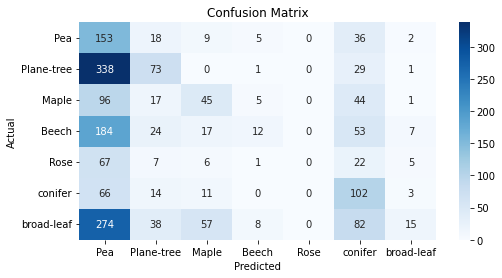

In [92]:
# 최종 보고서 작성시 그래프 그리기
cm = confusion_matrix(ytS, predS) 
print(cm)

report = classification_report(ytS, predS)
print(report)

# 'Pea':'1', 'Plane-tree':'2', 'Maple':'3', 'Beech':'4', 'Rose':'5', 'Etc1(침엽수)':'6', 'Etc2(활엽수)':'7'
plt.figure(figsize=(8,4))
# x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
# y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, xticklabels = x_lable, yticklabels = y_lable, fmt='d', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
# precision, recall의 의미를 잘 알고 해석해야 함.
# 그래프말고 
# 고랭지 배추와 감자가 혼재됨. => 해당시기 두 개의 분광특성이 유사하다는 의미 ... 다른 시기의 영상 ... 분류에 가장 중요한 것은 입력자료
# 보고서에서 가장 중요한 것. 어떠한 결과가 나와서 """해석/분석"""하는 것이 중요 .. 발전방향

[[115  33  33   2   9  27   4]
 [149 245  21   0   4  11  12]
 [ 71  25  49   4  10  38  11]
 [148  31  48   7   8  38  17]
 [ 67   3  14   1   6  12   5]
 [ 70   5  28   0   5  77  11]
 [215  42  93   5  21  72  26]]
              precision    recall  f1-score   support

           1       0.14      0.52      0.22       223
           2       0.64      0.55      0.59       442
           3       0.17      0.24      0.20       208
           4       0.37      0.02      0.04       297
           5       0.10      0.06      0.07       108
           6       0.28      0.39      0.33       196
           7       0.30      0.05      0.09       474

    accuracy                           0.27      1948
   macro avg       0.28      0.26      0.22      1948
weighted avg       0.34      0.27      0.25      1948



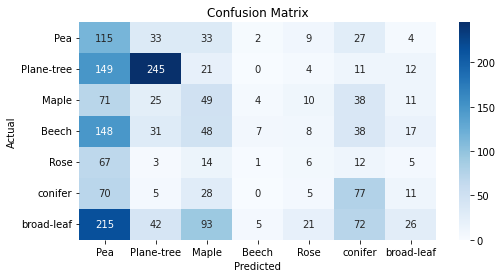

In [93]:
# 최종 보고서 작성시 그래프 그리기
cm = confusion_matrix(ytSG, predSG) 
print(cm)

report = classification_report(ytSG, predSG)
print(report)

# 'Pea':'1', 'Plane-tree':'2', 'Maple':'3', 'Beech':'4', 'Rose':'5', 'Etc1(침엽수)':'6', 'Etc2(활엽수)':'7'
plt.figure(figsize=(8,4))
# x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
# y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, xticklabels = x_lable, yticklabels = y_lable, fmt='d', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()